# diabetes 데이터셋 불러오고 5가지 모델 적용해보기

### 파일 불러오기

In [59]:
# csv 파일을 다운로드하여 로컬에서 불러오는 방법

import pandas as pd

# 붓꽃 데이터 CSV 파일 읽기
file_path = "C:\\workplace\\AI\\AI_2025-1\\week2\\diabetes.csv"  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head)
print(df.columns)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [57]:
# csv 파일을 깃허브 주소에서 불러오는 방법

import pandas as pd

# GitHub raw CSV URL
csv_url = "https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/diabetes.csv"

# CSV 데이터 읽기
df = pd.read_csv(csv_url)

# 데이터 확인
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 라이브러리 import

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# 데이터 분할
x = df.drop(columns=['Outcome'])  # 'Name' 열을 제외한 피처들
y = df['Outcome']  # 'Name' 열을 타겟으로

# 학습 데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# 데이터 정규화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # 학습 데이터 표준화
x_test = scaler.transform(x_test)  # 테스트 데이터 표준화

### 결정트리(DT) 모델

In [19]:
dt_model = DecisionTreeClassifier()   # 결정 트리(Decision Tree) 모델 생성
dt_model.fit(x_train, y_train)        # 모델 학습 (훈련 데이터로 학습 진행)
dt_pred = dt_model.predict(x_test)    # 테스트 데이터를 사용하여 예측 수행

print("\n[결정 트리(DT] 분류 보고서 :")
print(classification_report(y_test, dt_pred))
print(f"결정 트리(DT) 정확도 : {accuracy_score(y_test, dt_pred):.4f}")


[결정 트리(DT] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

결정 트리(DT) 정확도 : 0.7597


### 랜덤 포레스트(RF) 모델

In [70]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print("\n[랜덤 포레스트(RF)] 분류 보고서 :")
print(classification_report(y_test, rf_pred))
print(f"랜덤 포레스트(RF) 정확도 : {accuracy_score(y_test, rf_pred):.4f}")


[랜덤 포레스트(RF)] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

랜덤 포레스트(RF) 정확도 : 0.7468


### SVM 모델

In [23]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("\n[SVM] 분류 보고서 :")
print(classification_report(y_test, svm_pred))
print(f"SVM 정확도 : {accuracy_score(y_test, svm_pred):.4f}")


[SVM] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

SVM 정확도 : 0.7338


### 로지스틱 회귀(LR) 모델

In [25]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print("\n[로지스틱 회귀(LR)] 분류 보고서 :")
print(classification_report(y_test, lr_pred))
print(f"로지스틱 회귀(LR) 정확도 : {accuracy_score(y_test, lr_pred):.4f}")


[로지스틱 회귀(LR)] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

로지스틱 회귀(LR) 정확도 : 0.7532


In [49]:
# K-NN 모델 초기화
k = 100  # k 값은 사용자에 맞게 설정할 수 있습니다.
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 훈련
knn.fit(x_train, y_train)

# 예측
y_pred = knn.predict(x_test)

print(y_pred[50:60])
print(y_test[50:60])

[0 1 1 0 0 0 0 0 0 1]
629    0
516    1
375    1
451    1
511    0
234    0
361    0
494    0
692    0
404    1
Name: Outcome, dtype: int64


### K-NN 모델

In [49]:
# K-NN 모델 초기화
k = 100  # k 값은 사용자에 맞게 설정할 수 있습니다.
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 훈련
knn.fit(x_train, y_train)

# 예측
y_pred = knn.predict(x_test)

print(y_pred[50:60])
print(y_test[50:60])

[0 1 1 0 0 0 0 0 0 1]
629    0
516    1
375    1
451    1
511    0
234    0
361    0
494    0
692    0
404    1
Name: Outcome, dtype: int64


In [43]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")

Accuracy: 0.7727


### K 값 튜닝 그래프 그리기

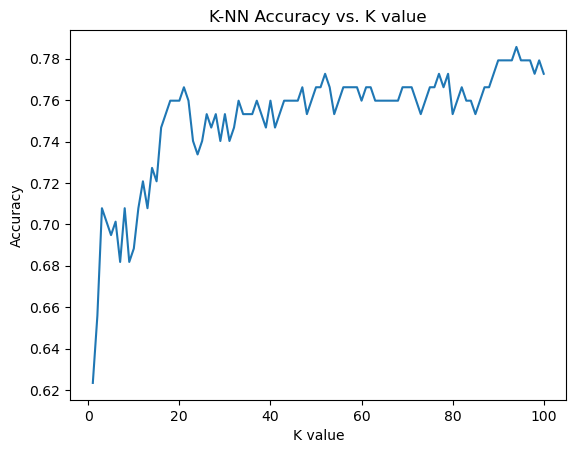

In [45]:
# 여러 K 값에 대해 정확도 확인
k_values = range(1, 101)  # 1부터 20까지의 K 값
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 정확도를 그래프으로 시각화
plt.plot(k_values, accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy vs. K value')
plt.show()